In [1]:
import sys
sys.path.append("/home/amigos/git/analy_n2data/")

In [2]:
#path = "/home/amigos/nfs_hdd/data/radio_pointing_line_9/n20191206081730_12CO_2-1_cross_IRC10216_pointing/"
path = "/home/amigos/nfs_hdd/data/radio_pointing_line_9/n20191206093630_12CO_2-1_cross_OriKL_pointing/"

In [3]:
import n2analy
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams["font.family"] = "Arial,freesans"
plt.rcParams["figure.facecolor"] = "white"

In [4]:
IF = "01"
data = n2analy.get_data(path, IF)

100%|██████████| 3/3 [00:00<00:00, 37.72it/s]

read end
HOT 0.0
0.0 OFF -30.0 -30.0
0.0 OFF -30.0 -60.0
0.0 OFF -30.0 0.0
0.0 OFF -30.0 30.0
0.0 OFF -30.0 60.0
0.0 OFF -60.0 -30.0
0.0 OFF -60.0 -60.0
0.0 OFF -60.0 0.0
0.0 OFF -60.0 30.0
0.0 OFF -60.0 60.0
0.0 OFF 0.0 -30.0
0.0 OFF 0.0 -60.0
0.0 OFF 0.0 0.0
0.0 OFF 0.0 30.0
0.0 OFF 0.0 60.0
0.0 OFF 30.0 -30.0
0.0 OFF 30.0 -60.0
0.0 OFF 30.0 0.0
0.0 OFF 30.0 30.0
0.0 OFF 30.0 60.0
0.0 OFF 60.0 -30.0
0.0 OFF 60.0 -60.0
0.0 OFF 60.0 0.0
0.0 OFF 60.0 30.0
0.0 OFF 60.0 60.0
1.0 OFF -30.0 -30.0
1.0 OFF -30.0 -60.0
1.0 OFF -30.0 30.0
1.0 OFF -30.0 60.0
1.0 OFF -60.0 -30.0
1.0 OFF -60.0 -60.0
1.0 OFF -60.0 30.0
1.0 OFF -60.0 60.0
1.0 OFF 0.0 -30.0
1.0 OFF 0.0 -60.0
1.0 OFF 0.0 30.0
1.0 OFF 0.0 60.0
1.0 OFF 30.0 -30.0
1.0 OFF 30.0 -60.0
1.0 OFF 30.0 30.0
1.0 OFF 30.0 60.0
1.0 OFF 60.0 -30.0
1.0 OFF 60.0 -60.0
1.0 OFF 60.0 30.0
1.0 OFF 60.0 60.0
2.0 OFF -30.0 -30.0
2.0 OFF -30.0 -60.0
2.0 OFF -30.0 0.0
2.0 OFF -30.0 30.0
2.0 OFF -30.0 60.0
2.0 OFF -60.0 -30.0
2.0 OFF -60.0 -60.0
2.0 OFF -60.0

In [5]:
data

<xarray.DataArray (t: 5495, GHz: 32768)>
array([[1.26716785e+10, 1.26716785e+10, 1.26716785e+10, ...,
        2.07071429e+11, 2.19209548e+11, 2.12139950e+11],
       [1.25865257e+10, 1.25865257e+10, 1.25865257e+10, ...,
        2.01916514e+11, 2.11753353e+11, 2.10904236e+11],
       [1.29417503e+10, 1.29417503e+10, 1.29417503e+10, ...,
        2.07760196e+11, 2.19725169e+11, 2.16363827e+11],
       ...,
       [1.26751519e+10, 1.26751519e+10, 1.26751519e+10, ...,
        2.13340652e+11, 2.32063877e+11, 2.24325927e+11],
       [1.26093169e+10, 1.26093169e+10, 1.26093169e+10, ...,
        2.13053456e+11, 2.33610002e+11, 2.26003157e+11],
       [1.27246582e+10, 1.27246582e+10, 1.27246582e+10, ...,
        2.17929974e+11, 2.26151809e+11, 2.33387262e+11]])
Coordinates:
  * t        (t) float64 1.576e+09 1.576e+09 1.576e+09 ... 1.576e+09 1.576e+09
  * GHz      (GHz) float64 0.0 6.104e-05 0.0001221 0.0001831 ... 2.0 2.0 2.0 2.0
    obsmode  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    scannum  (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    x        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    y        (t) <U21 '0' '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'

In [6]:
obsmode = data["obsmode"]
scannum = data["scannum"]
x = data["x"]
y = data["y"]

In [7]:
numpy.unique(obsmode)

array(['0', 'HOT', 'OFF', 'ON'], dtype='<U21')

In [8]:
xm60mask = x == '-60.0'
xm30mask = x == '-30.0'
x0mask = x == '0.0'
x30mask = x == '30.0'
x60mask = x == '60.0'


ym60mask = y == '-60.0'
ym30mask = y == '-30.0'
y0mask = y == '0.0'
y30mask = y == '30.0'
y60mask = y == '60.0'

onmask = obsmode == "ON"
offmask = obsmode == "OFF"
hotmask = obsmode == "HOT"

In [9]:
xy = ['-60.0', '-30.0', '0.0', '30.0', '60.0']
onxlist = []
for i in xy:
    mask1 = x == i
    mask = numpy.logical_and(mask1, onmask)
    onxlist.append(numpy.mean(data[mask], axis=0))
    
onylist = []
for i in xy:
    mask1 = y == i
    mask = numpy.logical_and(mask1, onmask)
    onylist.append(numpy.mean(data[mask], axis=0))

In [10]:
xy = ['-60.0', '-30.0', '0.0', '30.0', '60.0']
offxlist = []
for i in xy:
    mask1 = x == i
    mask = numpy.logical_and(mask1, offmask)
    offxlist.append(numpy.mean(data[mask], axis=0))
    
offylist = []
for i in xy:
    mask1 = y == i
    mask = numpy.logical_and(mask1, offmask)
    offylist.append(numpy.mean(data[mask], axis=0))

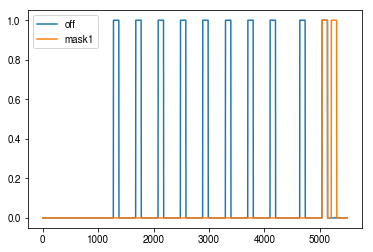

In [15]:
plt.plot(offmask, label="off")
plt.plot(mask1 , label="mask1")
plt.legend()
plt.show()

In [11]:
hotlist = []

for i in ["1.0", "2.0"]:
    mask1 = scannum == i
    mask = numpy.logical_and(mask1, hotmask)
    hotlist.append(numpy.mean(data[mask], axis=0))

In [12]:
xscan_Ta = []
for i in range(5):
    xscan_Ta.append(300*(onxlist[i] - offxlist[i])/(hotlist[0] - offxlist[i]))
    
yscan_Ta = []
for i in range(5):
    yscan_Ta.append(300*(onylist[i] - offylist[i])/(hotlist[1] - offylist[i]))

In [13]:
def f(x, a, b, c):
    return a*x**2 + b*x + c
def f(x, a, b, c, d):
    return a*x**3 + b*x**2+ c*x + d

# def f(x, a, b):
#     return a*x + b

def gaussian(x, a, mu, gamma):
    return a * numpy.exp(- gamma * (x - mu) **2)

In [14]:
arr_x = numpy.linspace(0, 32768, 32768)
def  baseline_fitting(arr_x, arr_y, index1, index2, index3, index4):
    tmpdata_y1 = arr_y[index1:index2]
    tmpdata_y2 = arr_y[index3:index4]
    tmpdata_x1 = arr_x[index1:index2]
    tmpdata_x2 = arr_x[index3:index4]
    x = numpy.concatenate([tmpdata_x1, tmpdata_x2])
    y = numpy.concatenate([tmpdata_y1, tmpdata_y2])
    #param = numpy.polyfit(x, y, 2)
    param = numpy.polyfit(x, y, 3)
    arr_y = arr_y - f(arr_x, *param)
    return arr_y

In [15]:

for i in range(5):
    xscan_Ta[i] = baseline_fitting(arr_x, xscan_Ta[i], 19000, 19500, 21000, 22000)
    yscan_Ta[i] = baseline_fitting(arr_x, yscan_Ta[i], 19000, 19500, 21000, 22000)
    
xscan_integ = []
yscan_integ = []


mi = 19500
ma = 21000
for i in range(5):
    xscan_integ .append(numpy.sum(xscan_Ta[i][mi:ma]))
    yscan_integ .append(numpy.sum(yscan_Ta[i][mi:ma]))

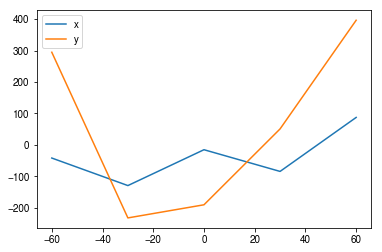

In [16]:
#xscan_integ
xscan_x = [-60, -30, 0, 30, 60]
xscan_y = [0, 0, 0, 0, 0]
#yscan_integ
yscan_x = [0, 0, 0, 0, 0]
yscan_y = [-60, -30, 0, 30, 60]

plt.plot(xscan_x, xscan_integ, label="x")
plt.plot(yscan_y, yscan_integ, label="y")
plt.legend()
plt.show()

In [ ]:
para_init = numpy.array([20000., 0.1, 0.0001])
# Gaussian Fitting function
# Az fitting
try:
    popt_az, pcov_az = curve_fit(gaussian, xscan_x, xscan_integ, p0 = para_init, maxfev=10000)
    error_az = numpy.sqrt(numpy.diag(pcov_az))

    x_g = numpy.linspace(xscan_x[0], xscan_x[-1], 1001)
    gaus_az = gaussian(x_g, popt_az[0], popt_az[1], popt_az[2])

# El fitting
    popt_el, pcov_el = curve_fit(gaussian, yscan_y, yscan_integ, p0 = para_init, maxfev=10000)
    error_el = numpy.sqrt(numpy.diag(pcov_el))

    gaus_el = gaussian(x_g, popt_el[0], popt_el[1], popt_el[2])


# dAz dEl
    dAz = popt_az[1]
    dEl = popt_el[1]
    hpbw_az =  1/numpy.sqrt(2*popt_az[2]) *2.35
    hpbw_el = 1/numpy.sqrt(2*popt_el[2]) *2.35


# plot
    
    fig = plt.figure(figsize = (15, 5))

    axlist = [fig.add_subplot(1,2,i+1) for i in range(2)]

    axlist[0].plot(xscan_x, xscan_integ, "o")
    #axlist[0].errorbar(xscan_x, xscan_integ, yerr = error_az[0], fmt = "b+")
    axlist[0].plot(x_g, gaus_az)
    axlist[0].set_xlabel("dAz [arcsec]")
    axlist[0].set_ylabel("Ta* [K]")

    axlist[1].plot(yscan_y, yscan_integ, "o")
    #axlist[1].errorbar(yscan_y, yscan_integ, yerr = error_el[0], fmt = "b+")
    axlist[1].plot(x_g, gaus_el)
    axlist[1].set_xlabel("dEl [arcsec]")
    axlist[1].set_ylabel("Ta* [K]")
    
    [a.grid() for a in axlist]

try:
    fig2 = plt.figure(figsize = (20,20))
        
    index_max = numpy.argmax(xscan_Ta[2][19800:21000])# + 4000 
    print(index_max)
    lim_mi = int(index_max - 800)
    lim_ma = int(index_max + 800)
    lim_mi = 21000
    lim_ma = 22000

    axlist = [fig2.add_subplot(5,5,i+1) for i in range(25)]
    axlist[2].plot(yscan_Ta[0])
    axlist[2].set_title("(0, 60)")
    axlist[2].set_xlim(lim_mi, lim_ma)
    axlist[2].set_ylim(-5,15)

    axlist[7].plot(yscan_Ta[1])
    axlist[7].set_title("(0, 30)")
    axlist[7].set_xlim(lim_mi, lim_ma)
    axlist[7].set_ylim(-5,15)

    axlist[10].plot(xscan_Ta[0])
    axlist[10].set_title("(-60, 0)")
    axlist[10].set_xlim(lim_mi, lim_ma)
    axlist[10].set_ylim(-5,15)

    axlist[11].plot(xscan_Ta[1])
    axlist[11].set_title("(-30, 0)")
    axlist[11].set_xlim(lim_mi, lim_ma)
    axlist[11].set_ylim(-5,15)

    axlist[12].plot(xscan_Ta[2])
    #axlist[12].plot(yscan_Ta[2])
    axlist[12].set_title("(0, 0)")
    axlist[12].set_xlim(lim_mi, lim_ma)
    axlist[12].set_ylim(-5,15)

    axlist[13].plot(xscan_Ta[3])
    axlist[13].set_title("(30, 0)")
    axlist[13].set_xlim(lim_mi, lim_ma)
    axlist[13].set_ylim(-5,15)

    axlist[14].plot(xscan_Ta[4])
    axlist[14].set_title("(60, 0)")
    axlist[14].set_xlim(lim_mi, lim_ma)
    axlist[14].set_ylim(-5,15)

    axlist[17].plot(yscan_Ta[3])
    axlist[17].set_title("(0, -30)")
    axlist[17].set_xlim(lim_mi, lim_ma)
    axlist[17].set_ylim(-5,15)

    axlist[22].plot(yscan_Ta[4])
    axlist[22].set_title("(0, -60)")
    axlist[22].set_xlim(lim_mi, lim_ma)
    axlist[22].set_ylim(-5,15)

        
    for i in [2,7,11,12,13,14,17,10,22]:
        axlist[i].set_ylim(-10, 10
                          )
        axlist[i].set_xlim(19000, 22000)
        
    axlist[0].set_visible(False)
    axlist[1].set_visible(False)
    axlist[3].set_visible(False)
    axlist[4].set_visible(False)
    axlist[5].set_visible(False)
    axlist[6].set_visible(False)
    axlist[8].set_visible(False)
    axlist[9].set_visible(False)
    axlist[15].set_visible(False)
    axlist[16].set_visible(False)
    axlist[18].set_visible(False)
    axlist[19].set_visible(False)
    axlist[20].set_visible(False)
    axlist[21].set_visible(False)
    axlist[23].set_visible(False)
    axlist[24].set_visible(False)

    [a.grid() for a in axlist]

    plt.axes([0.625,0.25, 0.25, 0.1])
    plt.axis("off")
    #plt.text(0, 0.5, "OBJECT :   {}".format(hdu[1].data["OBJECT"][0]), fontsize=10)
    plt.text(0,0,"dAz = {}".format(round(dAz, 2)) + "               dEl = {}".format(round(dEl, 2)) + "   (arcsec)", fontsize = 10)
    plt.text(0,-0.5,"HPBW_AZ = {}".format(round(hpbw_az, 2)) + "  HPBW_EL = {}".format(round(hpbw_el, 2)), fontsize = 10)
    plt.text(0, -1.0, "DATA PATH :   {}".format(path), fontsize=6)

except Exception as e:
    print("\033[31m[ERROR OCCURRED]\033[0m\n", e)
        
    # same as above
    fig2 = plt.figure(figsize = (20,20))
        
    axlist = [fig2.add_subplot(5,5,i+1) for i in range(25)]

    axlist[2].plot(yscan_Ta[0])
    axlist[2].set_title("(0, 60)")
    for i in [2,7,11,12,13,14,17,10,22]:
        #axlist[i].set_ylim(-5,10)
        #axlist[i].set_xlim(20000, 22000)
        axlist[i].set_ylim(-10, 10)
        axlist[i].set_xlim(19000, 22000)

    axlist[7].plot(yscan_Ta[1])
    axlist[7].set_title("(0, 30)")
  
    axlist[10].plot(xscan_Ta[0])
    axlist[10].set_title("(-60, 0)")

    axlist[11].plot(xscan_Ta[1])
    axlist[11].set_title("(-30, 0)")

    
    axlist[12].plot(xscan_Ta[2])
    #axlist[12].plot(yscan_Ta[2])
    axlist[12].set_title("(0, 0)")

    axlist[13].plot(xscan_Ta[3])
    axlist[13].set_title("(30, 0)")

    axlist[14].plot(xscan_Ta[4])
    axlist[14].set_title("(60, 0)")

    axlist[17].plot(yscan_Ta[3])
    axlist[17].set_title("(0, -30)")

    axlist[22].plot(yscan_Ta[4])
    axlist[22].set_title("(0, -60)")

    axlist[0].set_visible(False)
    axlist[1].set_visible(False)
    axlist[3].set_visible(False)
    axlist[4].set_visible(False)
    axlist[5].set_visible(False)
    axlist[6].set_visible(False)
    axlist[8].set_visible(False)
    axlist[9].set_visible(False)
    axlist[15].set_visible(False)
    axlist[16].set_visible(False)
    axlist[18].set_visible(False)
    axlist[19].set_visible(False)
    axlist[20].set_visible(False)
    axlist[21].set_visible(False)
    axlist[23].set_visible(False)
    axlist[24].set_visible(False)

    plt.axes([0.625,0.25, 0.25, 0.1])
    plt.axis("off")
    plt.text(0, 0.5, "ERROR OCCURRED", fontsize=10)
    #plt.text(0, 0, "OBJECT :   {}".format(hdu[1].data["OBJECT"][0]), fontsize=10)
    plt.text(0, -0.5, "DATA PATH :   {}".format(path), fontsize=6)

    [a.grid() for a in axlist]

finally:
    if savefig:
        #plt.savefig(savepath_filename)
        pass
    if plot:
        plt.show()
    else:
        pass